# Tutorial 1

I am just coding the following to be familiarize with one of the approch to classsify land use land cover from satellite EuroSAT: https://www.kaggle.com/nilesh789/land-cover-classification-with-eurosat-dataset

# Reading Dataset

In [3]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\Tutorial_1")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')
dataset = r'Euro_SAT_RGB'
labels = os.listdir(dataset)
print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


# Exploratory Data Analysis

## Some Histograms to look at the distribution of the dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

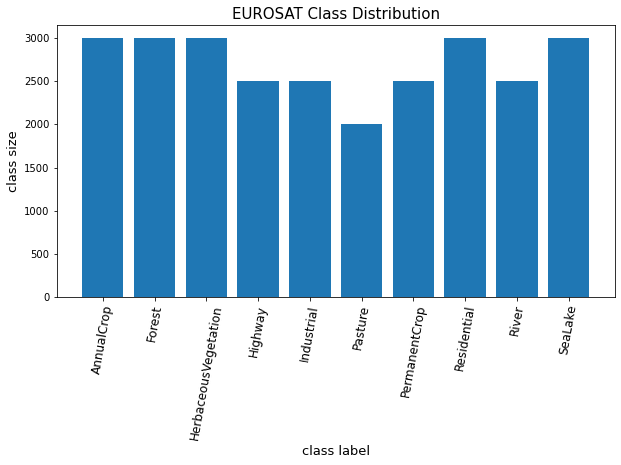

In [5]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l))) # to count numbers of files inside each folder

    
plt.figure(figsize=(10, 5))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=80)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

There are 10 classes of land use land cover

## Showing some figures

In [6]:
import PIL # pillow - image processing

In [7]:
# Reading figures ended in 1000 and 2000
img_paths = [os.path.join(dataset, l, l + '_1.jpg') for l in labels]
img_paths = img_paths + [os.path.join(dataset, l, l + '_2.jpg') for l in labels]
print(len(img_paths))
img_paths

20


['Euro_SAT_RGB\\AnnualCrop\\AnnualCrop_1.jpg',
 'Euro_SAT_RGB\\Forest\\Forest_1.jpg',
 'Euro_SAT_RGB\\HerbaceousVegetation\\HerbaceousVegetation_1.jpg',
 'Euro_SAT_RGB\\Highway\\Highway_1.jpg',
 'Euro_SAT_RGB\\Industrial\\Industrial_1.jpg',
 'Euro_SAT_RGB\\Pasture\\Pasture_1.jpg',
 'Euro_SAT_RGB\\PermanentCrop\\PermanentCrop_1.jpg',
 'Euro_SAT_RGB\\Residential\\Residential_1.jpg',
 'Euro_SAT_RGB\\River\\River_1.jpg',
 'Euro_SAT_RGB\\SeaLake\\SeaLake_1.jpg',
 'Euro_SAT_RGB\\AnnualCrop\\AnnualCrop_2.jpg',
 'Euro_SAT_RGB\\Forest\\Forest_2.jpg',
 'Euro_SAT_RGB\\HerbaceousVegetation\\HerbaceousVegetation_2.jpg',
 'Euro_SAT_RGB\\Highway\\Highway_2.jpg',
 'Euro_SAT_RGB\\Industrial\\Industrial_2.jpg',
 'Euro_SAT_RGB\\Pasture\\Pasture_2.jpg',
 'Euro_SAT_RGB\\PermanentCrop\\PermanentCrop_2.jpg',
 'Euro_SAT_RGB\\Residential\\Residential_2.jpg',
 'Euro_SAT_RGB\\River\\River_2.jpg',
 'Euro_SAT_RGB\\SeaLake\\SeaLake_2.jpg']

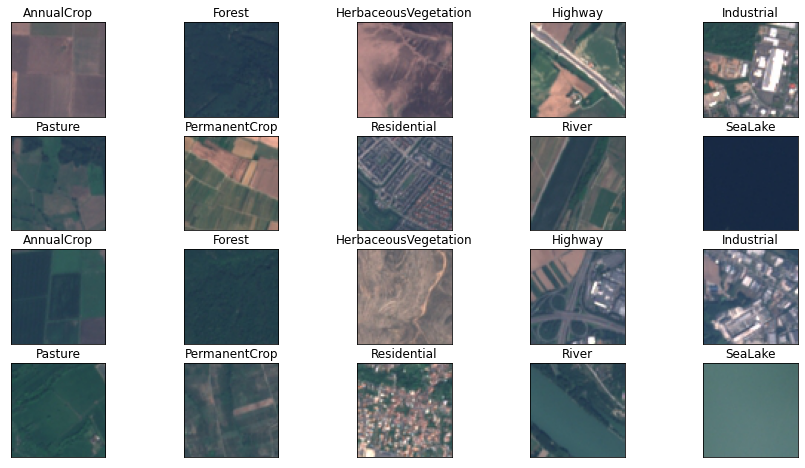

In [8]:
def plot_sat_imgs(paths):
    plt.figure(figsize = (15, 8))
    for i in range(20): # numer of images that you want to plot
        plt.subplot(4, 5, i+1, xticks = [], yticks = [])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split("\\")[-2]) #s / pc '\\'
plot_sat_imgs(img_paths)

## Showing the distribution of the RGB for figures ended in 1000

In [9]:
from skimage import io

In [10]:
def plot_img_histogram(img_path):
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('\\')[-2])
    plt.show()

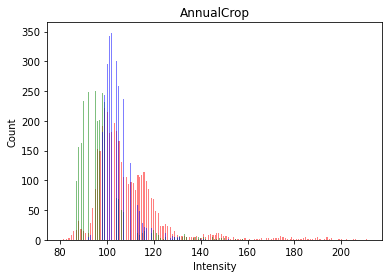

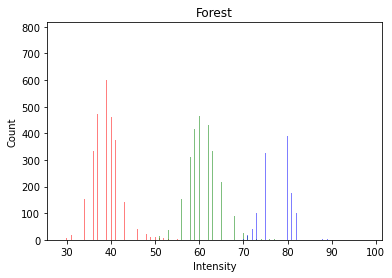

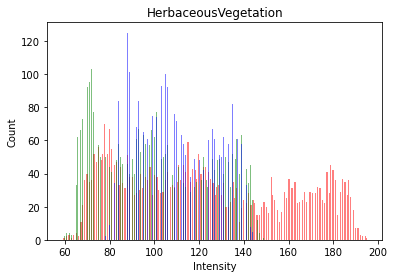

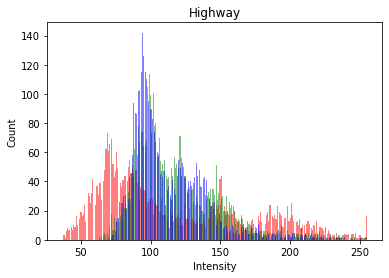

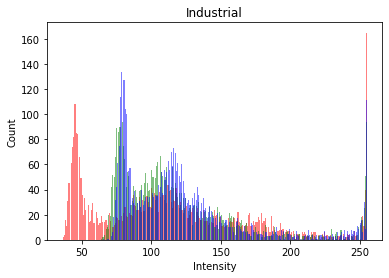

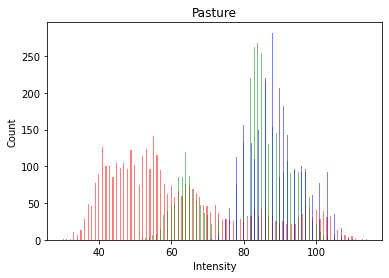

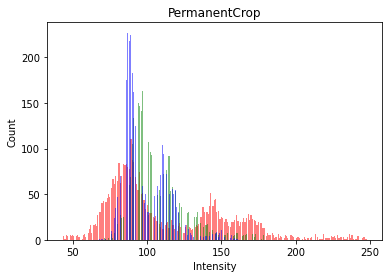

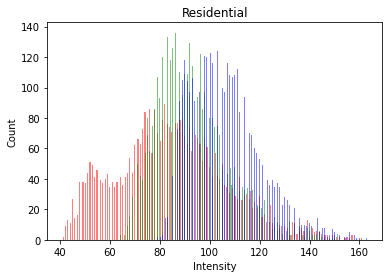

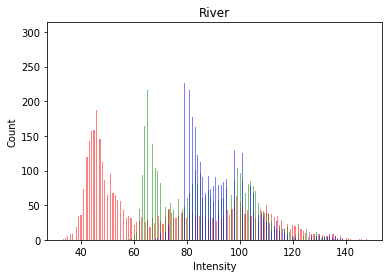

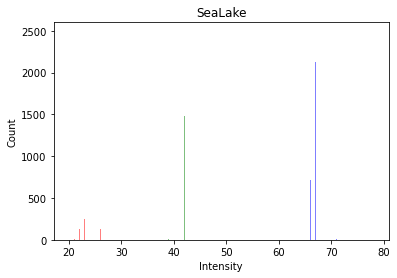

In [11]:
for l in labels:
    path = os.path.join(dataset, l, l+'_1.jpg')
    plot_img_histogram(path)

# Training and Test Dataset

## Spliting Dataset

Splitting the dataset into 80% and 20% respectively, and saving them into 2 different folders (training_dataset,testing_dataset)

In [12]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm # library's name: te quiero demasiado
import shutil # support file copying and removal

Using TensorFlow backend.


In [13]:
train_dir = 'training_dataset_60'
test_val_dir = 'test_val_dataset_40'
test_dir = 'testing_dataset_20'
val_dir = 'validation_dataset_20'
batch_size = 128
num_classes =len(labels)
input_shape = (64, 64, 3)
class_mode = 'categorical'

### Defining the train size (60 percent) and the separating the other 40 to slit into testing and validation dataset

In [14]:
# create training and testing directories
for path in (train_dir, test_val_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test (SUBFOLDERS)
for l in labels:
    if not os.path.exists(os.path.join(train_dir, l)):
        os.mkdir(os.path.join(train_dir, l))
    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_val_dir, l))

In [15]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir(dataset+'/'+l):
        data.update({os.path.join(dataset, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=69)

# split the list of image paths
for train_idx, test_val_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_val_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'Euro_SAT_RGB', 'training_dataset_60', i) for i in train_paths]
    new_test_paths = [re.sub(r'Euro_SAT_RGB', 'test_val_dataset_40', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training_60', 'testing_40', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training_60', 'testing_40', i[1])):
                shutil.copy(i[0], i[1])

  0%|          | 46/16200 [00:00<01:11, 226.24it/s]

moving training files..


  0%|          | 27/10800 [00:00<00:40, 265.23it/s]

moving testing files..


100%|██████████| 10800/10800 [00:47<00:00, 226.97it/s]


### Defining the testing and validation size 50/50 from the 40 percent

In [16]:
# create training and testing directories
for path in (test_dir, val_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test (SUBFOLDERS)
for l in labels:
    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_dir, l))
    if not os.path.exists(os.path.join(val_dir, l)):
        os.mkdir(os.path.join(val_dir, l))

In [17]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir('test_val_dataset_40'+'/'+l):
        data.update({os.path.join('test_val_dataset_40', l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'test_val_dataset_40', 'testing_dataset_20', i) for i in train_paths]
    new_test_paths = [re.sub(r'test_val_dataset_40', 'validation_dataset_20', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('testing_20', 'validation_20', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('testing_20', 'validation_20', i[1])):
                shutil.copy(i[0], i[1])

  0%|          | 22/5400 [00:00<00:26, 206.16it/s]

moving training files..


  0%|          | 22/5400 [00:00<00:25, 214.14it/s]

moving testing files..


100%|██████████| 5400/5400 [00:24<00:00, 217.08it/s]


In [18]:
train_paths

7009     test_val_dataset_40\PermanentCrop\PermanentCro...
4395           test_val_dataset_40\Highway\Highway_495.jpg
4973     test_val_dataset_40\Industrial\Industrial_1850...
1536            test_val_dataset_40\Forest\Forest_1746.jpg
5548     test_val_dataset_40\Industrial\Industrial_868.jpg
                               ...                        
4067          test_val_dataset_40\Highway\Highway_2054.jpg
7333     test_val_dataset_40\PermanentCrop\PermanentCro...
8289     test_val_dataset_40\Residential\Residential_30...
10043         test_val_dataset_40\SeaLake\SeaLake_2007.jpg
5844          test_val_dataset_40\Pasture\Pasture_1523.jpg
Length: 5400, dtype: object

In [19]:
# Create a ImageDataGenerator Instance which can be used for data augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)

# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)
# validation generator for evaluation purposes with no augmentations, just rescaling
vali_gen = ImageDataGenerator(
    rescale=1./255,
)

vali_generator = vali_gen.flow_from_directory(
    directory=val_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 16200 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [20]:
len(test_generator.filenames)

5400

In [21]:
# Looking at the indices
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [22]:
np.save('class_indices', train_generator.class_indices)

In [23]:
train_gen

# Machine Learning for Image Classification (Delete this section)

In [24]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=16200, 
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)
rf_val_generator = rf_gen.flow_from_directory(
    directory=val_dir,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Found 16200 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


Some notes:
- Each image as the shape of 64x64x3 (dpx-dpx-(RGB)) = 12288 - see bellow

In [25]:
img = PIL.Image.open(img_paths[1], 'r')
img.size

(64, 64)

In [26]:
train = rf_train_generator.next()
X_train = train[0].reshape(16200, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]

val = rf_val_generator.next()
X_val = test[0].reshape(5400, 12288)
y_val = test[1]

In [27]:
train[0].shape

(16200, 64, 64, 3)

# Importing useful Libraries and Setting up the GPU

In [28]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

In [29]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


In [30]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# ResNet50 Function

In [31]:
def compile_model(input_shape, n_classes, optimizer, fine_tune=None):
    conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)
            
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', #sparse_categorical_entropy
                 metrics=['categorical_accuracy'])
    
    return model

# History Function

In [32]:
def plot_history(history):
       
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

# Displaying the results Function

In [33]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

# Plot Prediction Function

In [34]:
def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))   

# Running the ResNet50 Model

In [37]:
resnet50_model = compile_model(input_shape, num_classes, Adam(lr=1e-2), fine_tune=None)
resnet50_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

###  Making some Callbacks to storage the parameters

In [38]:
from datetime import datetime
start = datetime.now()

train_generator.reset() #if you forget to reset the test_generator you will get outputs in a weird order.
vali_generator.reset()

N_STEPS = train_generator.samples//batch_size
N_VAL_STEPS = vali_generator.samples//batch_size
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='model_weights_best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))


Time Taken for testing: 0:00:00.000998


In [39]:
from datetime import datetime
start = datetime.now()
# First Pretraining the dense layer
resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=vali_generator,
                             validation_steps=N_VAL_STEPS)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

Epoch 1/50
126/126 [==============================] - 58s 458ms/step - loss: 6.1508 - categorical_accuracy: 0.7119 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.1071

Epoch 00001: val_categorical_accuracy improved from -inf to 0.10714, saving model to model_weights_best.hdf5
Epoch 2/50
126/126 [==============================] - 21s 170ms/step - loss: 0.7293 - categorical_accuracy: 0.7916 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0895

Epoch 00002: val_categorical_accuracy did not improve from 0.10714
Epoch 3/50
126/126 [==============================] - 21s 168ms/step - loss: 0.7339 - categorical_accuracy: 0.7924 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0895

Epoch 00003: val_categorical_accuracy did not improve from 0.10714
Epoch 4/50
126/126 [==============================] - 21s 168ms/step - loss: 0.7053 - categorical_accuracy: 0.8019 - val_loss: 1.2666e-07 - val_categorical_accuracy: 0.0895

Epoch 00004: val_categorical_accuracy did not improve from 0.

In [40]:
start = datetime.now()
# re-train whole network end2end 
resnet50_model = compile_model(input_shape, num_classes, Adam(lr=1e-4), fine_tune=0)

resnet50_model.load_weights('model_weights_best.hdf5')

train_generator.reset()
test_generator.reset()

resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=N_EPOCHS,
                             callbacks=[early_stop, checkpoint, reduce_lr],
                             validation_data=vali_generator,
                             validation_steps=N_VAL_STEPS)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

C:\Users\said_\Anaconda3\envs\Tensorflow_Deep_Learning\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/100
126/126 [==============================] - 51s 405ms/step - loss: 0.5395 - categorical_accuracy: 0.8592 - val_loss: 6.0257e-07 - val_categorical_accuracy: 0.1071

Epoch 00001: val_categorical_accuracy did not improve from 0.11381
Epoch 2/100
126/126 [==============================] - 37s 294ms/step - loss: 0.3230 - categorical_accuracy: 0.9107 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0895

Epoch 00002: val_categorical_accuracy did not improve from 0.11381
Epoch 3/100
126/126 [==============================] - 37s 296ms/step - loss: 0.2546 - categorical_accuracy: 0.9276 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0895

Epoch 00003: val_categorical_accuracy did not improve from 0.11381
Epoch 4/100
126/126 [==============================] - 38s 299ms/step - loss: 0.2112 - categorical_accuracy: 0.9385 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0897

Epoch 00004: val_categorical_accuracy did not improve from 0.11381
Epoch 5/100
126/126 [===========

# looking the results

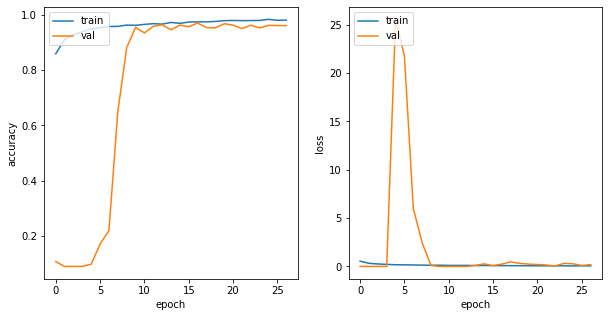

In [41]:
plot_history(resnet50_history)

In [42]:
resnet50_model.load_weights('model_weights_best.hdf5')

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

test_generator_new = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

predictions = resnet50_model.predict_generator(test_generator_new, steps=len(test_generator_new.filenames))
predicted_classes = np.argmax(np.rint(predictions), axis=1)
true_classes = test_generator_new.classes

prf, conf_mat = display_results(true_classes, predicted_classes, class_indices.values())
prf

Found 5400 images belonging to 10 classes.
Accuracy: 0.9681481481481482
Global F2 Score: 0.9681481481481482


,Precision,Recall,F-Score,Support
AnnualCrop,0.950658,0.963333,0.956954,600.0
Forest,0.969055,0.991667,0.980231,600.0
HerbaceousVegetation,0.979522,0.956667,0.967960,600.0
Highway,0.979424,0.952000,0.965517,500.0
Industrial,0.975510,0.956000,0.965657,500.0
Pasture,0.972081,0.957500,0.964736,400.0
PermanentCrop,0.948104,0.950000,0.949051,500.0
Residential,0.946288,0.998333,0.971614,600.0
River,0.966601,0.984000,0.975223,500.0
SeaLake,0.998273,0.963333,0.980492,600.0


In [43]:
conf_mat

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
AnnualCrop,578,0,0,2,0,2,14,0,4,0
Forest,0,595,0,0,0,1,0,3,0,1
HerbaceousVegetation,3,5,574,0,1,5,9,3,0,0
Highway,3,0,1,476,8,2,1,3,6,0
Industrial,0,0,0,1,478,0,1,19,1,0
Pasture,7,4,5,0,0,383,1,0,0,0
PermanentCrop,9,0,6,1,2,0,475,6,1,0
Residential,0,0,0,0,1,0,0,599,0,0
River,2,0,0,6,0,0,0,0,492,0
SeaLake,6,10,0,0,0,1,0,0,5,578


In [44]:
# Save the model and the weights
resnet50_model.save('ResNet50_eurosat.h5')

# Model Prediction calling the files that were saved

In [45]:
from tensorflow import keras

In [46]:
resnet50_model = keras.models.load_model('ResNet50_eurosat.h5')
#resnet50_model.load_weights('model_weights_best.hdf5')

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

test_generator_new = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

predictions = resnet50_model.predict_generator(test_generator_new, steps=len(test_generator_new.filenames))
predicted_classes = np.argmax(np.rint(predictions), axis=1)
true_classes = test_generator_new.classes

prf, conf_mat = display_results(true_classes, predicted_classes, class_indices.values())
prf

Found 5400 images belonging to 10 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Accuracy: 0.9681481481481482
Global F2 Score: 0.9681481481481482


,Precision,Recall,F-Score,Support
AnnualCrop,0.950658,0.963333,0.956954,600.0
Forest,0.969055,0.991667,0.980231,600.0
HerbaceousVegetation,0.979522,0.956667,0.967960,600.0
Highway,0.979424,0.952000,0.965517,500.0
Industrial,0.975510,0.956000,0.965657,500.0
Pasture,0.972081,0.957500,0.964736,400.0
PermanentCrop,0.948104,0.950000,0.949051,500.0
Residential,0.946288,0.998333,0.971614,600.0
River,0.966601,0.984000,0.975223,500.0
SeaLake,0.998273,0.963333,0.980492,600.0


In [47]:
predictions.shape

(5400, 10)

In [48]:
predicted_classes # contains the prediction classes for each image

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [49]:
predicted_classes.shape # contains the prediction classes for each image

(5400,)

In [50]:
predictions[0].shape

(10,)

In [51]:
class_indices #where the classes are here

{0: 'AnnualCrop',
 1: 'Forest',
 2: 'HerbaceousVegetation',
 3: 'Highway',
 4: 'Industrial',
 5: 'Pasture',
 6: 'PermanentCrop',
 7: 'Residential',
 8: 'River',
 9: 'SeaLake'}

In [52]:
class_indices[0]

'AnnualCrop'

### Clarifying some concepts

In [53]:
test_generator_new[0]

array([[[[0.8313726 , 0.6784314 , 0.61960787],
         [0.83921576, 0.6745098 , 0.61960787],
         [0.8470589 , 0.68235296, 0.627451  ],
         ...,
         [0.29411766, 0.41176474, 0.3803922 ],
         [0.2509804 , 0.38431376, 0.3803922 ],
         [0.2392157 , 0.36078432, 0.37254903]],

        [[0.82745105, 0.68235296, 0.61960787],
         [0.8352942 , 0.68235296, 0.62352943],
         [0.8470589 , 0.68235296, 0.627451  ],
         ...,
         [0.2901961 , 0.41176474, 0.3921569 ],
         [0.25490198, 0.3803922 , 0.37647063],
         [0.2392157 , 0.36078432, 0.37254903]],

        [[0.7960785 , 0.6666667 , 0.60784316],
         [0.80392164, 0.654902  , 0.6039216 ],
         [0.8235295 , 0.6666667 , 0.61960787],
         ...,
         [0.2392157 , 0.37254903, 0.36862746],
         [0.2392157 , 0.36078432, 0.36862746],
         [0.23529413, 0.35686275, 0.3647059 ]],

        ...,

        [[0.6313726 , 0.5764706 , 0.53333336],
         [0.6156863 , 0.5803922 , 0.54509807]

In [54]:
test_generator_new[0].shape

(1, 64, 64, 3)

In [55]:
test_generator_new[0][0].shape

(64, 64, 3)

In [56]:
test_generator_new.filenames[0]

'AnnualCrop\\AnnualCrop_1000.jpg'

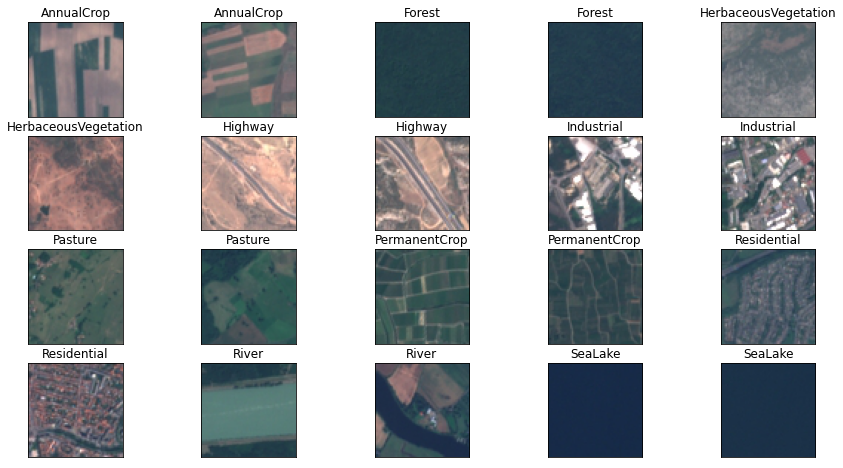

In [57]:
number_images = [1,500,616,1100,1230,1696,1820,2001,2400,2700,2902,3100,3300,3600,3800,4100,4500,4700,4900,5100]
plt.figure(figsize = (15, 8))
for i, r in enumerate(number_images):
    plt.subplot(4, 5, i+1, xticks = [], yticks = [])
    plt.imshow(test_generator_new[r][0]) # [the image from the images selected in the generator][there is just one image so 0 takes that image]
    plt.title(class_indices[predicted_classes[r]])